In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/ML Project/data_reduced.zip'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import shutil
import os 

# define function to plot results

def plot_history(history, yrange):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Plot training and validation accuracy per epoch
    plt.subplot(1,2,1)
    plt.plot(epochs, acc,  label='Train')
    plt.plot(epochs, val_acc , label='Val')
    
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(yrange)
    plt.legend(['Train', 'Val'], loc='lower right')
    
    # Plot training and validation loss per epoch
    #plt.figure()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    
    plt.title('Classification Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    
    #plt.show()
    plt.tight_layout()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

img_rows, img_cols = 224, 224

train_data_dir = '/content/data_reduced/train_data/'
validation_data_dir = '/content/data_reduced/val_data/'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        horizontal_flip=True
        )
 
validation_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
 
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')

Found 16095 images belonging to 200 classes.
Found 400 images belonging to 200 classes.


In [8]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import math
from keras.models import load_model

checkpoint = ModelCheckpoint("/content/drive/MyDrive/ML Project/best_weights/mobilenet_retrained.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)


# load model
model = load_model('/content/drive/MyDrive/ML Project/models/mobilenet.h5')

# Enter the number of training and validation samples here
nb_train_samples = 16095
nb_validation_samples = 400
# We only train 5 EPOCHS 
initial_epochs = 7

batch_size = 32

callbacks = [earlystop, checkpoint]

history_retrained = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = initial_epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/7
502/502 [==============================] - ETA: 0s - loss: 1.5294 - accuracy: 0.5859 - auc: 0.9754
Epoch 00001: val_loss improved from inf to 2.38987, saving model to /content/drive/MyDrive/ML Project/best_weights/mobilenet_retrained.h5
502/502 [==============================] - 850s 2s/step - loss: 1.5294 - accuracy: 0.5859 - auc: 0.9754 - val_loss: 2.3899 - val_accuracy: 0.4661 - val_auc: 0.9295
Epoch 2/7
502/502 [==============================] - ETA: 0s - loss: 1.5043 - accuracy: 0.5919 - auc: 0.9759
Epoch 00002: val_loss improved from 2.38987 to 2.37409, saving model to /content/drive/MyDrive/ML Project/best_weights/mobilenet_retrained.h5
502/502 [==============================] - 856s 2s/step - loss: 1.5043 - accuracy: 0.5919 - auc: 0.9759 - val_loss: 2.3741 - val_accuracy: 0.4557 - val_auc: 0.9323
Epoch 3/7
502/502 [==============================] - ETA: 0s - loss: 1.4816 - accuracy: 0.6009 - auc: 0.9765
Epoch 00003: val_loss improved from 2.37409 to 2.32063, saving mo

In [9]:
model.save_weights('/content/drive/MyDrive/ML Project/best_weights/mobilenet_retrained.h5')

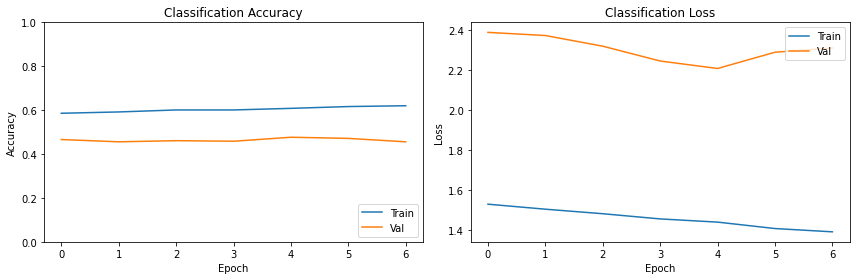

In [10]:
# plot the model's result

mobilenet_train_acc_cat = history_retrained.history['accuracy']
mobilenet_val_acc_cat = history_retrained.history['val_accuracy']

plot_history(history_retrained, yrange=(0,1))

In [11]:
target = [
        'n000003',
        'n000010',
        'n000011',
        'n000013',
        'n000015',
        'n000017',
        'n000018',
        'n000020',
        'n000023',
        'n000024',
        'n000025',
        'n000028',
        'n000032',
        'n000033',
        'n000034',
        'n000035',
        'n000038',
        'n000041',
        'n000042',
        'n000046',
        'n000048',
        'n000049',
        'n000051',
        'n000053',
        'n000054',
        'n000057',
        'n000059',
        'n000062',
        'n000064',
        'n000065',
        'n000070',
        'n000072',
        'n000074',
        'n000075',
        'n000077',
        'n000086',
        'n000088',
        'n000089',
        'n000093',
        'n000101',
        'n000108',
        'n000110',
        'n000111',
        'n000113',
        'n000115',
        'n000118',
        'n000119',
        'n000120',
        'n000121',
        'n000125',
        'n000127',
        'n000130',
        'n000131',
        'n000143',
        'n000150',
        'n000151',
        'n000154',
        'n000155',
        'n000157',
        'n000158',
        'n000159',
        'n000163',
        'n000167',
        'n000168',
        'n000170',
        'n000171',
        'n000182',
        'n000185',
        'n000187',
        'n000188',
        'n000189',
        'n000192',
        'n000193',
        'n000195',
        'n000196',
        'n000197',
        'n000199',
        'n000202',
        'n000203',
        'n000204',
        'n000207',
        'n000208',
        'n000210',
        'n000211',
        'n000212',
        'n000214',
        'n000216',
        'n000217',
        'n000218',
        'n000219',
        'n000221',
        'n000224',
        'n000229',
        'n000231',
        'n000234',
        'n000236',
        'n000239',
        'n000240',
        'n000243',
        'n000248',
        'n000249',
        'n000250',
        'n000252',
        'n000253',
        'n000254',
        'n000256',
        'n000258',
        'n000261',
        'n000265',
        'n000267',
        'n000274',
        'n000276',
        'n000279',
        'n000281',
        'n000283',
        'n000285',
        'n000286',
        'n000287',
        'n000289',
        'n000290',
        'n000291',
        'n000295',
        'n000297',
        'n000298',
        'n000300',
        'n000303',
        'n000304',
        'n000306',
        'n000308',
        'n000309',
        'n000310',
        'n000311',
        'n000318',
        'n000323',
        'n000324',
        'n000327',
        'n000329',
        'n000332',
        'n000333',
        'n000334',
        'n000335',
        'n000336',
        'n000339',
        'n000340',
        'n000345',
        'n000347',
        'n000349',
        'n000351',
        'n000352',
        'n000354',
        'n000355',
        'n000357',
        'n000358',
        'n000359',
        'n000360',
        'n000361',
        'n000364',
        'n000365',
        'n000367',
        'n000369',
        'n000371',
        'n000375',
        'n000376',
        'n000379',
        'n000380',
        'n000383',
        'n000386',
        'n000387',
        'n000390',
        'n000391',
        'n000392',
        'n000397',
        'n000402',
        'n000403',
        'n000413',
        'n000415',
        'n000417',
        'n000418',
        'n000419',
        'n000420',
        'n000422',
        'n000423',
        'n000424',
        'n000427',
        'n000429',
        'n000434',
        'n000435',
        'n000437',
        'n000441',
        'n000442',
        'n000443',
        'n000444',
        'n000446',
        'n000449',
        'n000450',
        'n000451',
        'n000455',
        'n000457',
        'n000458',
        'n000461']

13/13 [==============================] - 14s 1s/step
ROC AUC score:  0.7236180904522612


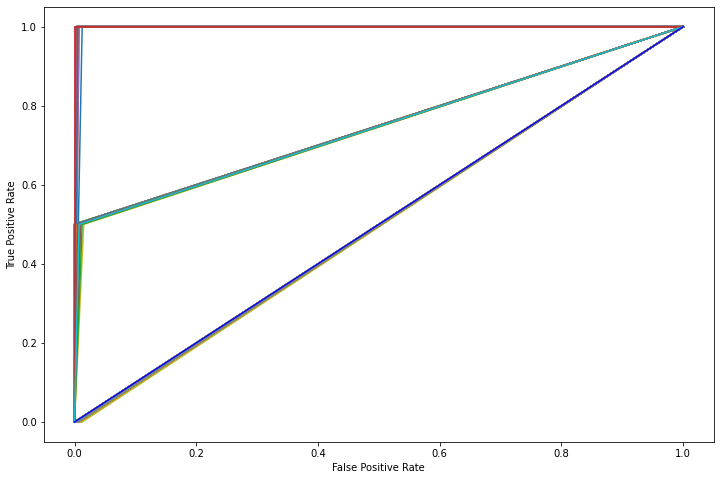

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt 
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target): # all_labels: no. of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
validation_generator.reset() # resetting generator
y_pred = model.predict(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)


c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
print('ROC AUC score: ', multiclass_roc_auc_score(validation_generator.classes, y_pred))

# Test the model

In [14]:
# define function for testing the models

from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
import random

def model_tester(full_model):
    
    %matplotlib inline

    # This first part selects a random file from the validation directory
    type = random.choice(os.listdir('/content/data_reduced/test_data'))
    #print(type)
    file = random.choice(os.listdir(f'/content/data_reduced/test_data/{type}'))
    #print(file)

    random_path = '/content/data_reduced/test_data' + '/' + type + '/' + file
    #print(random_path)

    # We then create the list of labels 
    person_dict = train_generator.class_indices
    label_list = {v: k.lower().capitalize() for k, v in person_dict.items()}
    label_list

    # We then select the image, preprocess and predict the values from full_model
    img_path = random_path
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    answer=full_model.predict(x)
    probability=round(np.max(full_model.predict(x)*100),2)
    
    # Prediction
    print ('This model suggests the image below is a: ',
           label_list[np.argmax(full_model.predict(x)*100)],
           ' with a probability of' ,probability,'%' ) 
    
    plt.imshow(img) 
   
    # Ground Truth
    print('____________________________________')
    print('The ground truth is:  ' ,type)
    print('____________________________________\n')


    #If we want to display the next two likely outcomes we can use:
    z = full_model.predict(x)*100
    temp = np.argpartition(z[0], -3)[-3:]
    #print(temp)
    #print(z[0][temp])
    temp = np.argsort(-z[0])[:3]

    print('The two next most likely choices are: \n', 
            '          ' , label_list[temp[1]], 'with probability', round(z[0][temp][1], 2),'% \n', 
            '          ' , label_list[temp[2]], 'with probability', round(z[0][temp][2], 2), '%' )
    print('____________________________________')

This model suggests the image below is a:  N000334  with a probability of 89.33 %
____________________________________
The ground truth is:   n000334
____________________________________

The two next most likely choices are: 
            N000283 with probability 3.42 % 
            N000434 with probability 3.04 %
____________________________________


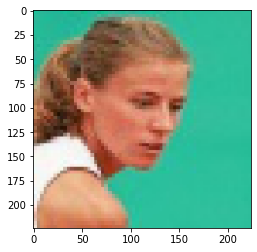

In [18]:
model_tester(full_model=model)

This model suggests the image below is a:  N000159  with a probability of 96.14 %
____________________________________
The ground truth is:   n000159
____________________________________

The two next most likely choices are: 
            N000154 with probability 1.55 % 
            N000121 with probability 0.78 %
____________________________________


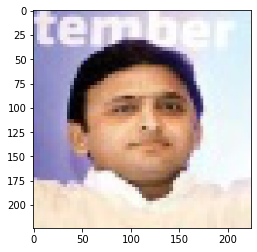

In [17]:
model_tester(full_model=model)

This model suggests the image below is a:  N000212  with a probability of 48.13 %
____________________________________
The ground truth is:   n000158
____________________________________

The two next most likely choices are: 
            N000158 with probability 20.84 % 
            N000077 with probability 12.64 %
____________________________________


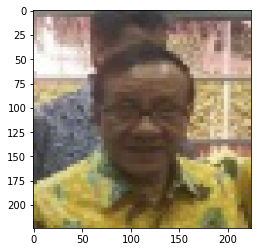

In [21]:
model_tester(full_model=model)

In [22]:
# save the model
model.save('/content/drive/MyDrive/ML Project/models/retrained_mobilenet.h5')